In [3]:
from cellOpt import *

In [4]:
def blob(r):
    return 1/(1 + r)
# Double source boundary condition
def doubleSource(x, y):
    rxy = lambda x,y: x**2 + y**2
    return blob(rxy(x, y-0.5)/0.1) + blob(rxy(x, y+0.5)/0.1)
# Single source boundary condition
def singleSource(x, y):
    rxy = lambda x,y: x**2 + y**2
    return blob(rxy(x, y-0.5)/0.1)

In [5]:
X, Y = jnp.meshgrid(jnp.linspace(-1, 1, 100), jnp.linspace(-1, 1, 100))
G = doubleSource
g = jnp.array(vmap(G)(X, Y))

In [6]:
regcs = [0.001, 0.0001, 0]
seed = 0
key = random.key(seed)

In [7]:
colors = ["#f7e3d4","#fc7307","#be17dd","#fddc22","#342e09","#1daf1d"]
colMap = 'Blues'

In [8]:

#Initial guess
a = 0.5; b=1
CvecCirk = jnp.array([0j, 1/2*(a-b)+0j, 0j, 1/2*(a+b)+0j ,0j])
freq = jnp.linspace(-2, 2, len(CvecCirk))
#Adding noise
#noise1 = random.normal(key, shape=(len(CvecCirk),)); noise2 = random.normal(key, shape=(len(CvecCirk),))
#Or pure ellipse
noise1 = 0; noise2 = 0
coff = (CvecCirk + 0.1 * noise1 + 0.1j*noise2)/(1+jnp.abs(freq))
    
#Set the middlepoint
midx = int(jnp.floor(len(coff)/2))
r0 = Fourier(coff)
seg = GaussSegments(splitIntervals(findCorners(r0),1), 16)
t, w = seg.getSegments()    
xm = middleP(r0, t, w)    
coff = coff.at[midx].set(coff[midx]-(xm[0] + 1j*xm[1]))

## Gradient descent

In [9]:
itsL = []; coffsL = []; xysL = []; xmsL = []; lossesL = [] 
nrOfQuadPoints = 16
initialStepsize = 0.5

for r in regcs:
    it, retcoff, xy, xm, loss, _, _ = cellGradSearch(G, coff, True, regularization=r, maxiterations=10, n=16, gam= 0.5)
    itsL.append(it); coffsL.append(retcoff); xysL.append(xy); xmsL.append(xm); lossesL.append(loss)


Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4


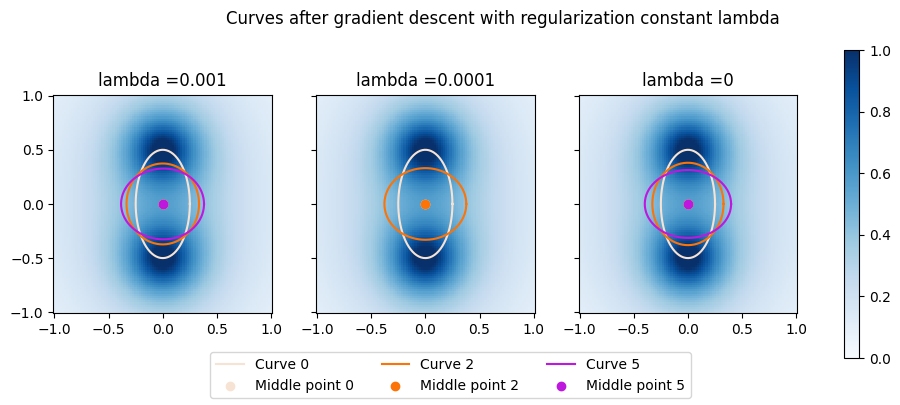

In [11]:
plottedIts = [0, itsL[0][2], itsL[0][5]]
labelsCurves = [f'Curve {str(itsL[0][i])}' for i in plottedIts]
labelsPoints = [f'Middle point {str(itsL[0][i])}' for i in plottedIts]
labels = []
for l1, l2 in zip(labelsCurves, labelsPoints):
    labels.append(l1)
    labels.append(l2)

fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharey=True)

plt.suptitle(f'Curves after gradient descent with regularization constant lambda')

for i, ax in enumerate(axes):
    #ax.set_title(r'$\lambda =$' + str(regcs[i]))
    ax.set_title(f'lambda ={regcs[i]}')
    im = ax.pcolormesh(X, Y, g, cmap=colMap, vmin=0, vmax=1)
    ax.set_aspect('equal')

fig.colorbar(im, ax=axes.ravel().tolist())
t = jnp.linspace(0, jnp.pi*2, 150)
for i, j in enumerate(plottedIts):
    for k in range(len(regcs)):
        if j < len(itsL[k]):
            axes[k].plot(*vmap(Fourier(coffsL[k][j]))(t), color=colors[i])
            axes[k].scatter(*xmsL[k][j], color=colors[i])
            axes[k].set_aspect('equal', 'box')

plt.figlegend(labels=labels, loc=8, ncols=3)

